In [1]:
import pandas as pd
import numpy as np

from helper import *

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('max_columns', 100)

In [51]:
df_origin = pd.read_csv('../data/historical_data/integrated_data.csv')
df_origin.head()

/home/dnj/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,35,36,39,41,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raceid,racedate,KettoNum,KisyuCode,Time,KakuteiJyuni,Wakuban,Umaban,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,BanusiCode,Futan,Blinker,MinaraiCD,BaTaijyu,IJyoCD,NyusenJyuni,DochakuKubun,DochakuTosu,ChakusaCD,ChakusaCDP,Ninki,Honsyokin,RecordUpKubun,DMGosaP,DMGosaM,DMJyuni,KyakusituKubun,RaceInfo$YoubiCD,RaceInfo$TokuNum,RaceInfo$Kakko,RaceInfo$KakkoEng,RaceInfo$Kubun,RaceInfo$Nkai,GradeCD,JyokenInfo$SyubetuCD,JyokenInfo$KigoCD,JyokenInfo$JyuryoCD,JyokenInfo$JyokenCD$1,JyokenInfo$JyokenCD$2,JyokenInfo$JyokenCD$3,JyokenInfo$JyokenCD$4,JyokenInfo$JyokenCD$5,Kyori,TrackCD,CourseKubunCD,Honsyokin$1,Honsyokin$2,Honsyokin$3,Honsyokin$4,Honsyokin$5,Honsyokin$6,Fukasyokin$1,Fukasyokin$2,Fukasyokin$3,Fukasyokin$4,Fukasyokin$5,TorokuTosu,SyussoTosu,NyusenTosu,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Zogen
0,2008-01-05 01:06,2008-01-05,2005107051,1031,752,8,1,1,0,2,1,3,3,1,437,898009,540,0,0,428,0,8,0,0,112,,9,0,0,0,0,9,2,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,12.0
1,2008-01-05 01:06,2008-01-05,2005102028,733,739,1,1,2,0,2,1,3,3,1,138,498800,540,0,0,450,0,1,0,0,,,4,50000,0,4,4,8,1,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
2,2008-01-05 01:06,2008-01-05,2005104156,684,742,3,2,3,0,2,1,3,3,1,1054,486800,540,0,0,458,0,3,0,0,134,,5,13000,0,4,4,2,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,4.0
3,2008-01-05 01:06,2008-01-05,2005105319,672,749,6,2,4,0,2,1,3,3,1,1081,515800,540,0,0,402,0,6,0,0,212,,14,0,0,7,23,15,4,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,-10.0
4,2008-01-05 01:06,2008-01-05,2005101044,663,739,2,3,5,0,2,1,3,3,1,1088,163002,540,0,0,482,0,2,0,0,H,,6,20000,0,0,0,6,3,1.0,0.0,,...,0.0,0.0,,12.0,023,3.0,0.0,703.0,0.0,0.0,703.0,1200.0,24.0,,50000.0,20000.0,13000.0,7500.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,2.0,0.0,1.0,2.0


In [3]:
extended_data = pd.read_csv('../data/historical_data/extended_data.csv', index_col=0)
extended_data.head()

,Kyori,Track_type,Weather
raceid,,,
2018-05-26 01:05,1600.0,Dirt Standard,Cloudy
2018-05-26 01:08,1800.0,Dirt Standard,Cloudy
2018-05-26 02:05,1400.0,Turf Firm,Cloudy
2018-05-26 02:08,1400.0,Dirt Standard,Cloudy
2018-05-26 03:05,1800.0,Turf Firm,Cloudy


# Select some relevant columns

See `Horse-Race-Data-Description.xlsx` for more details

In [4]:
essential_cols = [
'raceid',
'racedate',
'Time', # THỜI GIAN
'KakuteiJyuni', # THỨ TỰ VỀ ĐÍCH
'DochakuKubun', # cùng về đích hay không
'DochakuTosu', # số lượng cùng về 3 giá trị
'Umaban', # số của ngựa: 18 giá trị
'KettoNum', # mã số đăng ký huyết thống
'UmaKigoCD', # loại ngựa (nguồn gốc) 8 giá trị
'SexCD', # giới tính: 3 giá trị
'HinsyuCD', # Product code: 2 giá trị
'KeiroCD', # màu lông 8 giá trị
'Barei', # tuổi ngựa
'TozaiCD', # khu vực: 4 giá trị
'ChokyosiCode', # code huấn luyện viên
'Futan', # khối lượng đảm nhiệm, đơn vị 0.1kg
'Blinker', # sử dụng bịt che mắt hay không
'KisyuCode', # Jockey code link với bảng 4
'MinaraiCD', # code thành tích jockey
'BaTaijyu', # khối lượng ngựa
'Zogen', # tăng hoặc giảm khối lượng
'IJyoCD', # CODE PHÂN LOẠI BẤT THƯỜnG
'Honsyokin', # TIỀN THƯỞNG
'RaceInfo$YoubiCD', # ngày trong tuần hoặc holiday
'GradeCD', # mã cuộc đua đặc biệt
# 'JyokenInfo$KigoCD', # mã chủng loại cuộc đua
'JyokenInfo$JyuryoCD', # Weight type code
'Kyori', # CỰ LY theo m
'TrackCD', # loại sân
'TenkoBaba$TenkoCD', # MÃ THỜI TIẾT
'TenkoBaba$SibaBabaCD', # TÌNH TRẠNG SÂN CỎ
'TenkoBaba$DirtBabaCD', # TÌNH TRẠNG SÂN ĐẤT
]

In [52]:
df = df_origin[essential_cols].copy()
df.head(3)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
0,2008-01-05 01:06,2008-01-05,752,8,0,0,1,2005107051,0,2,1,3,3,1,437,540,0,1031,0,428,12.0,0,0,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
1,2008-01-05 01:06,2008-01-05,739,1,0,0,2,2005102028,0,2,1,3,3,1,138,540,0,733,0,450,-10.0,0,50000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0
2,2008-01-05 01:06,2008-01-05,742,3,0,0,3,2005104156,0,2,1,3,3,1,1054,540,0,684,0,458,4.0,0,13000,1.0,,3.0,1200.0,24.0,2.0,0.0,1.0


# Null values

In [53]:
df.isna().sum(axis=0)

raceid                     0
racedate                5165
Time                       0
KakuteiJyuni               0
DochakuKubun               0
DochakuTosu                0
Umaban                     0
KettoNum                   0
UmaKigoCD                  0
SexCD                      0
HinsyuCD                   0
KeiroCD                    0
Barei                      0
TozaiCD                    0
ChokyosiCode               0
Futan                      0
Blinker                    0
KisyuCode                  0
MinaraiCD                  0
BaTaijyu                   0
Zogen                    339
IJyoCD                     0
Honsyokin                  0
RaceInfo$YoubiCD        5165
GradeCD                 5165
JyokenInfo$JyuryoCD     5165
Kyori                   5165
TrackCD                 5165
TenkoBaba$TenkoCD       5165
TenkoBaba$SibaBabaCD    5165
TenkoBaba$DirtBabaCD    5165
dtype: int64

In [7]:
extended_data['TrackCD'] = extended_data['Track_type'].apply(lambda x: x.split()[0])
extended_data.head()

,Kyori,Track_type,Weather,TrackCD
raceid,,,,
2018-05-26 01:05,1600.0,Dirt Standard,Cloudy,Dirt
2018-05-26 01:08,1800.0,Dirt Standard,Cloudy,Dirt
2018-05-26 02:05,1400.0,Turf Firm,Cloudy,Turf
2018-05-26 02:08,1400.0,Dirt Standard,Cloudy,Dirt
2018-05-26 03:05,1800.0,Turf Firm,Cloudy,Turf


In [54]:
def tracktype_map(code):
    if code == 0:
        return 'Not set'
    elif code < 23:
        return 'Turf'
    elif code < 30:
        return 'Dirt'
    elif code < 60:
        return 'Jump'
    else:
        return np.nan

In [55]:
df['TrackCD'] = df['TrackCD'].apply(tracktype_map)

In [56]:
naindex = df[df['racedate'].isna()].index
for idx in naindex:
    idx2 = df.loc[idx, 'raceid']
    df.loc[idx, 'Kyori'] = extended_data.loc[idx2, 'Kyori']
    df.loc[idx, 'TrackCD'] = extended_data.loc[idx2, 'TrackCD']


In [57]:
df.tail(2)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD
525661,2018-07-01 12:07,NaN,1202,8,0,0,14,2014102088,0,1,1,3,4,2,1042,560,0,1155,1,456,-4.0,0,0,NaN,NaN,NaN,1900.0,Dirt,NaN,NaN,NaN
525662,2018-07-01 12:07,NaN,1220,14,0,0,15,2014106395,0,1,1,3,4,2,425,570,0,1122,0,520,-2.0,0,0,NaN,NaN,NaN,1900.0,Dirt,NaN,NaN,NaN


In [58]:
# fill missing values in Zogen column by 0
df.fillna({'Zogen':0.0}, inplace=True)


# EDA

In [59]:
print(f"""Number of unique horses: {df['KettoNum'].nunique()}
Number of races: {df['raceid'].nunique()}
Number of jockeys: {df['KisyuCode'].nunique()}""")

Number of unique horses: 54759
Number of races: 36285
Number of jockeys: 470


## Add some fields

In [60]:
df['Speed'] = df['Kyori']/df['Time']
df['Top 1'] = (df['KakuteiJyuni'] < 2) & (df['KakuteiJyuni'] > 0)
df['Top 3'] = (df['KakuteiJyuni'] < 4) & (df['KakuteiJyuni'] > 0)

In [61]:
print('Max speed:',df['Speed'].max(), '\tMin speed:',df['Speed'].min())
df['Speed'].replace(np.inf, 0.0, inplace=True)
print('Max speed:',df['Speed'].max(), '\tMin speed:',df['Speed'].min())

Max speed: inf 	Min speed: 0.6103763987792472
Max speed: 1.858736059479554 	Min speed: 0.0


In [16]:
max_horse_in_race = df.groupby('raceid').agg({'raceid':'count'})
max_horse_in_race.head()

,raceid
raceid,
2008-01-05 01:06,16
2008-01-05 01:08,16
2008-01-05 02:06,16
2008-01-05 02:08,16
2008-01-05 03:06,16


In [62]:
def fix_KakuteiJyuni(row):
    return (row['KakuteiJyuni'] - 1)/(max_horse_in_race.loc[row['raceid'], 'raceid']-1)*99 + 1

df['KakuteiJyuni_fixed'] = df.apply(fix_KakuteiJyuni, axis=1)

In [18]:
df.head(2)

,raceid,racedate,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,UmaKigoCD,SexCD,HinsyuCD,KeiroCD,Barei,TozaiCD,ChokyosiCode,Futan,Blinker,KisyuCode,MinaraiCD,BaTaijyu,Zogen,IJyoCD,Honsyokin,RaceInfo$YoubiCD,GradeCD,JyokenInfo$JyuryoCD,Kyori,TrackCD,TenkoBaba$TenkoCD,TenkoBaba$SibaBabaCD,TenkoBaba$DirtBabaCD,Speed,Top 1,Top 3,KakuteiJyuni_fixed
0,2008-01-05 01:06,2008-01-05,752,8,0,0,1,2005107051,0,2,1,3,3,1,437,540,0,1031,0,428,12.0,0,0,1.0,,3.0,1200.0,Dirt,2.0,0.0,1.0,1.595745,False,False,47.2
1,2008-01-05 01:06,2008-01-05,739,1,0,0,2,2005102028,0,2,1,3,3,1,138,540,0,733,0,450,-10.0,0,50000,1.0,,3.0,1200.0,Dirt,2.0,0.0,1.0,1.623816,True,True,1.0


# Analyze horses

In [19]:
def gender_identify(group):
    min_ = group.min()
    if min_ != group.max():
        return 4
    else:
        return min_

In [21]:
df_valid = df[df['Speed']>0.]

In [22]:
df_horse = df_valid.groupby('KettoNum').agg({'SexCD':gender_identify,
                                        'HinsyuCD':'min',
                                        'KeiroCD':'min',
                                        'TozaiCD':'min',
                                        'Top 1':'sum',
                                        'Top 3':'sum',
                                        'Time':'mean',
                                        'Speed':'mean',
                                        'KakuteiJyuni':'min',
                                        'KakuteiJyuni_fixed':'mean',
                                        'KettoNum':'count'})

In [23]:
df_horse.rename(columns={'KettoNum': 'Number of races', 'KakuteiJyuni': 'Best achievement'}, inplace=True)
df_horse['Top 3 rate'] = df_horse['Top 3']/df_horse['Number of races']                       
df_horse.head()

,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Top 3 rate
KettoNum,,,,,,,,,,,,
1996110169,1,1,3,2,0,0,843.333333,1.662206,7,69.200000,3,0.000000
1997103860,1,1,3,1,0,1,708.857143,1.693335,2,50.652521,7,0.142857
1997105482,3,1,3,1,1,4,1970.857143,1.488194,1,23.846154,7,0.571429
1998100158,1,1,3,1,0,0,1042.333333,1.610584,9,67.000000,3,0.000000
1998100265,3,1,4,2,1,1,1180.000000,1.659259,1,61.708013,9,0.111111


In [24]:
horse_map = {'SexCD': {0:'not set', 1:'Male',2:'Female',3:'Castrated male', 4:'Changed'},
            'HinsyuCD': {0:'not set', 1: 'Thoroughbred', 2:'< 25% Arab blood'},
            'KeiroCD': {0:  'not set',
                        1: 'Brown hair',
                        2:  'Tochi chestnut hair',
                        3:  'Bald hair',
                        4:  'Black deer',
                        5:  'Blue deer hair',
                        6:  'Blue hair',
                        7:  'Eyelash',
                        8:  'Chestnut hair',
                        9:  'Deer hair',
                        10: 'Blue hair',
                        11: 'White hair'}
}

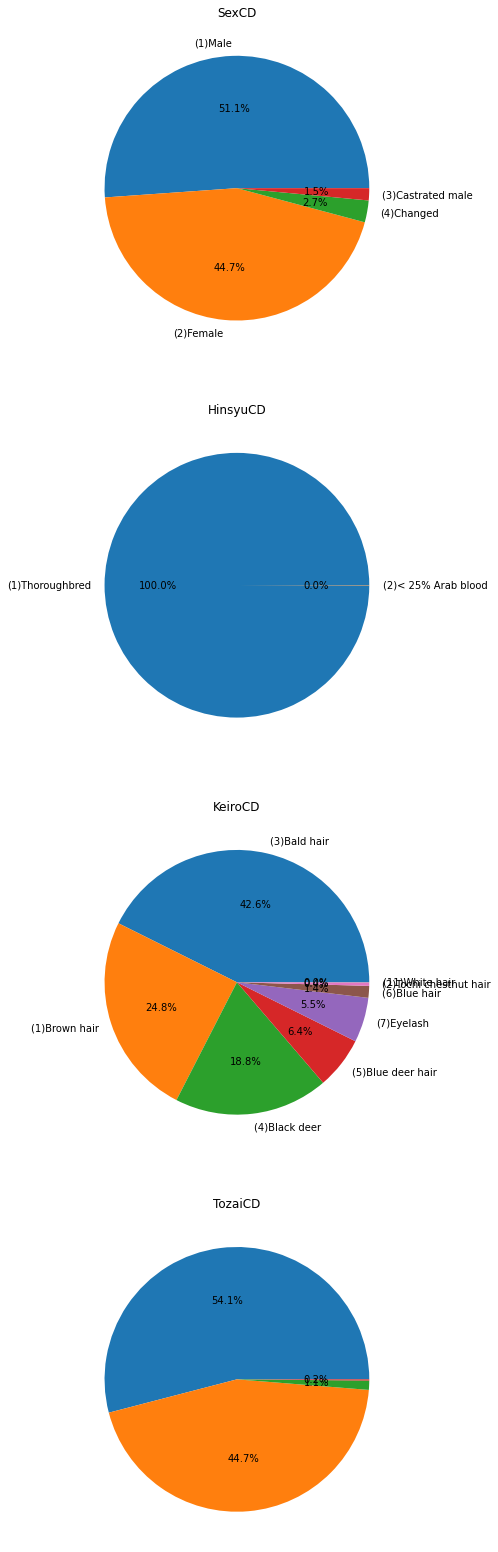

In [25]:
plt.figure(figsize=(7,28))
idx_ = 1
for col in ['SexCD', 'HinsyuCD', 'KeiroCD', 'TozaiCD']:
    data_ = df_horse[col].value_counts()
    plt.subplot(4,1,idx_)
    if col in horse_map:
        labels=[f'({i})'+horse_map[col][int(i)] for i in data_.index]
    else:
        labels=None
    plt.pie(x=data_, labels=labels, autopct='%1.1f%%')
    plt.title(col)
    idx_ += 1

In [26]:
print('5 horses with most win race')
df_horse.sort_values('Top 1', ascending=False).head()

5 horses with most win race


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Top 3 rate
KettoNum,,,,,,,,,,,,
2009102739,1,1,7,2,15,21,1503.882353,1.635543,1,21.303740,34,0.617647
2012102013,1,1,3,2,12,18,1419.550000,1.645181,1,12.133687,20,0.900000
2011101125,1,1,3,1,12,15,2255.363636,1.485667,1,19.289585,22,0.681818
2007100575,1,1,3,2,11,22,1169.000000,1.658779,1,30.384334,45,0.488889
2009100301,2,1,3,2,11,17,760.827586,1.715784,1,22.712599,29,0.586207


In [27]:
print('5 horses with most top 3 award')
df_horse.sort_values('Top 3', ascending=False).head()

5 horses with most top 3 award


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Top 3 rate
KettoNum,,,,,,,,,,,,
2010104176,1,1,3,1,7,30,1365.636364,1.567454,1,35.085204,77,0.389610
2010101161,1,1,3,2,5,29,1103.224138,1.668389,1,32.952677,58,0.500000
2008104798,1,1,3,2,7,27,1179.708333,1.668713,1,24.260753,48,0.562500
2009103405,1,1,3,2,4,27,1154.772727,1.611263,1,33.791702,88,0.306818
2007102721,1,1,1,2,6,27,934.900000,1.647922,1,23.398791,40,0.675000


In [28]:
print('5 horses with highest top 3 rate')
df_horse.sort_values('Top 3 rate', ascending=False).head()

5 horses with highest top 3 rate


,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Top 3 rate
KettoNum,,,,,,,,,,,,
2015110104,1,1,1,2,1,1,1158.000000,1.554404,1,1.000000,1,1.0
2015104378,2,1,5,1,2,5,783.200000,1.636259,1,4.960000,5,1.0
2016102118,2,1,5,1,0,1,708.000000,1.694915,3,19.000000,1,1.0
2015102815,1,1,3,2,1,3,729.333333,1.645425,1,5.400000,3,1.0
2008104958,1,1,3,2,0,1,828.000000,1.690821,3,15.142857,1,1.0


In [29]:
df_horse.describe()

,SexCD,HinsyuCD,KeiroCD,TozaiCD,Top 1,Top 3,Time,Speed,Best achievement,KakuteiJyuni_fixed,Number of races,Top 3 rate
count,54591.000000,54591.000000,54591.00000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000,54591.000000,54591.00000
mean,1.556997,1.000421,3.07950,1.473704,0.665879,1.997875,1002.576214,1.608822,5.280706,58.851411,9.546647,0.14091
std,0.660652,0.020522,1.56673,0.529856,1.258389,3.280169,215.232941,0.049740,4.470932,21.294439,9.324660,0.19409
min,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,557.000000,1.059447,0.000000,1.000000,1.000000,0.00000
25%,1.000000,1.000000,2.00000,1.000000,0.000000,0.000000,831.577381,1.577199,1.000000,42.677352,3.000000,0.00000
50%,1.000000,1.000000,3.00000,1.000000,0.000000,0.000000,995.809524,1.609567,4.000000,57.536071,6.000000,0.00000
75%,2.000000,1.000000,4.00000,2.000000,1.000000,3.000000,1135.111111,1.641951,9.000000,75.411765,12.000000,0.25000
max,4.000000,2.000000,11.00000,4.000000,15.000000,30.000000,3264.000000,1.795332,18.000000,100.000000,88.000000,1.00000


Text(0, 0.5, 'Top 3 rate')

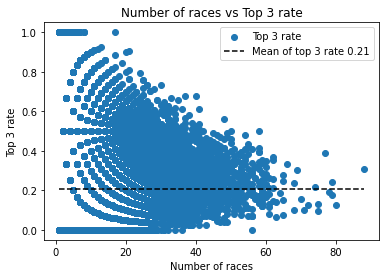

In [30]:
plt.scatter(x='Number of races', y='Top 3 rate', data=df_horse)
mean_top3_rate = df_horse['Top 3'].sum()/df_horse['Number of races'].sum()
plt.hlines(y=mean_top3_rate,
            xmin=df_horse['Number of races'].min(),
            xmax=df_horse['Number of races'].max(),
            colors='k',
            linestyles='--',
            label=f'Mean of top 3 rate {np.round(mean_top3_rate, 2)}')
plt.legend()
plt.title('Number of races vs Top 3 rate')
plt.xlabel('Number of races')
plt.ylabel('Top 3 rate')

## Analyze horse characteristics

In [31]:

df_group_ = df_valid.groupby('TrackCD', dropna=True) # drop rows with nan values
groups_ = list(df_group_.groups.keys())
horse_performance_groups = {}
for group in groups_:
    horse_performance_groups[group] = df_group_.get_group(group).groupby('KettoNum').agg({'SexCD':gender_identify,
                                                                                        'HinsyuCD':'min',
                                                                                        'KeiroCD':'min',
                                                                                        'TozaiCD': 'min',
                                                                                        'Top 1':'sum',
                                                                                        'Top 3': 'sum',
                                                                                        'Speed': 'mean'})

In [32]:
def map_axis_ticklabels(mapping, name, axes, axis):
    if axis == 'x':
        ticklabels = axes.get_xticklabels()
    elif axis == 'y':
        ticklabels = axes.get_yticklabels()
    else:
        raise ValueError('axis must be x or y')
    for tick in ticklabels:
        tick.set_text(mapping[name][int(tick.get_text())])
    if axis == 'x':
        return axes.set_xticklabels(ticklabels)
    elif axis == 'y':
        return axes.set_yticklabels(ticklabels)

### Gender

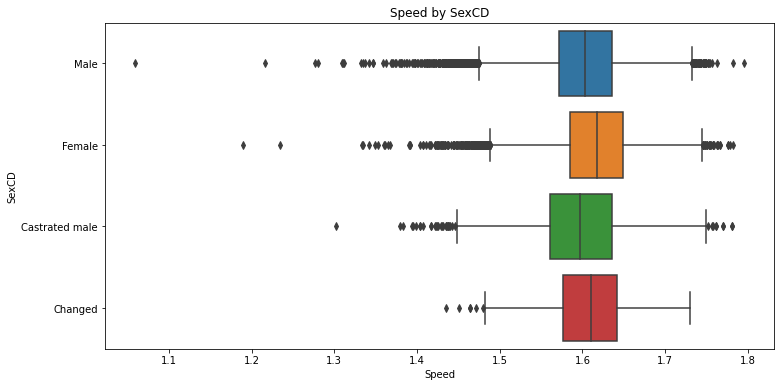

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Speed', y='SexCD', data=df_horse, orient='h')
plt.title('Speed by SexCD')
ticklabels = map_axis_ticklabels(horse_map, 'SexCD', ax, 'y')

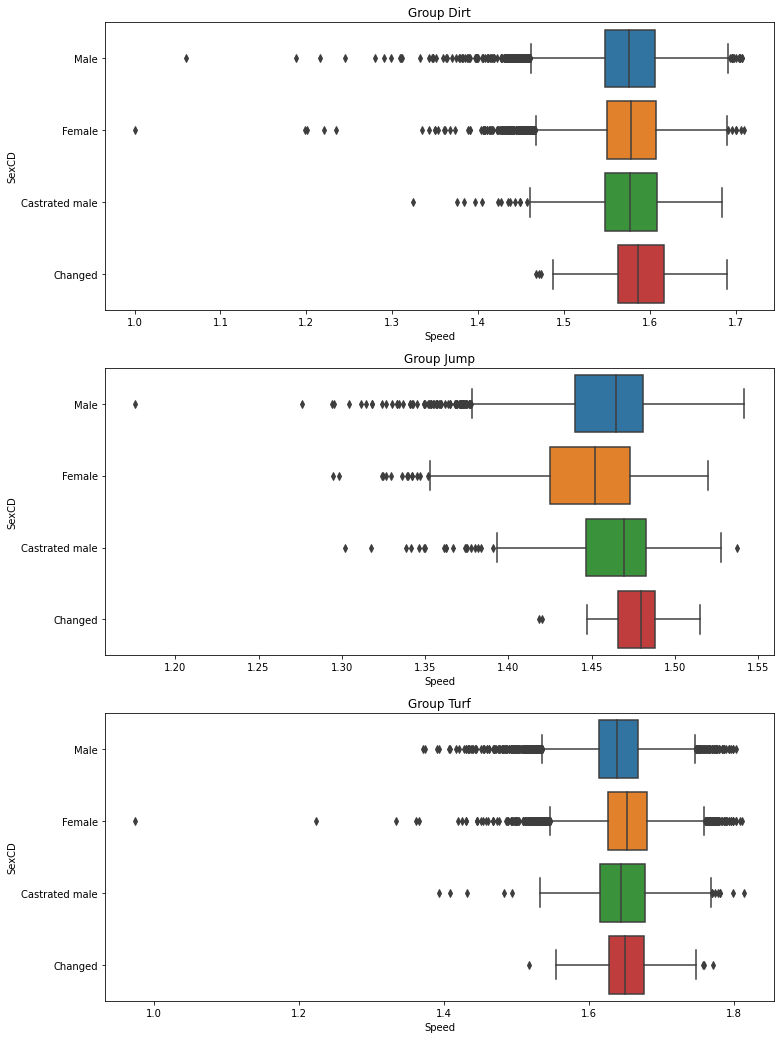

In [34]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='SexCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'SexCD', ax, 'y')

### Product code

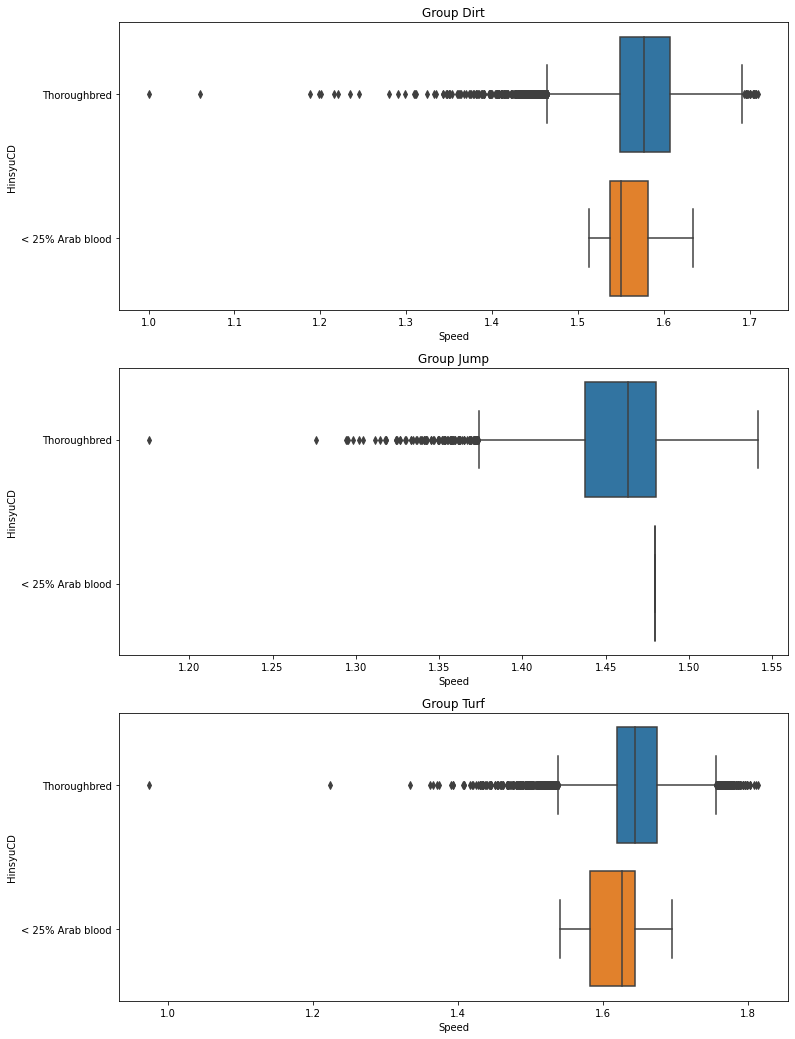

In [35]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='HinsyuCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'HinsyuCD', ax, 'y')

### Hair color

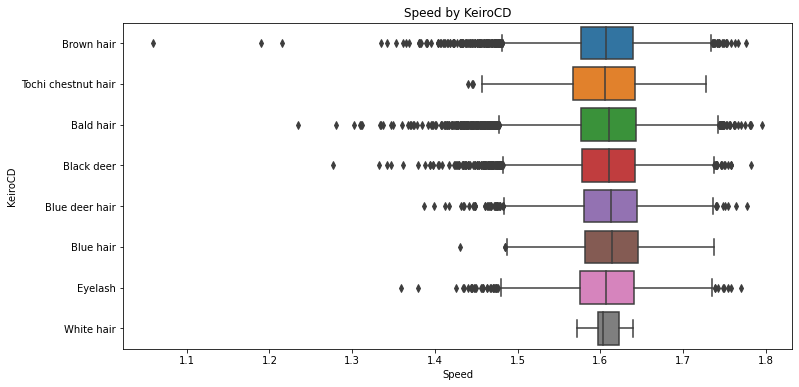

In [36]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Speed', y='KeiroCD', data=df_horse, orient='h')
plt.title('Speed by KeiroCD')
ticklabels = map_axis_ticklabels(horse_map, 'KeiroCD', ax, 'y')

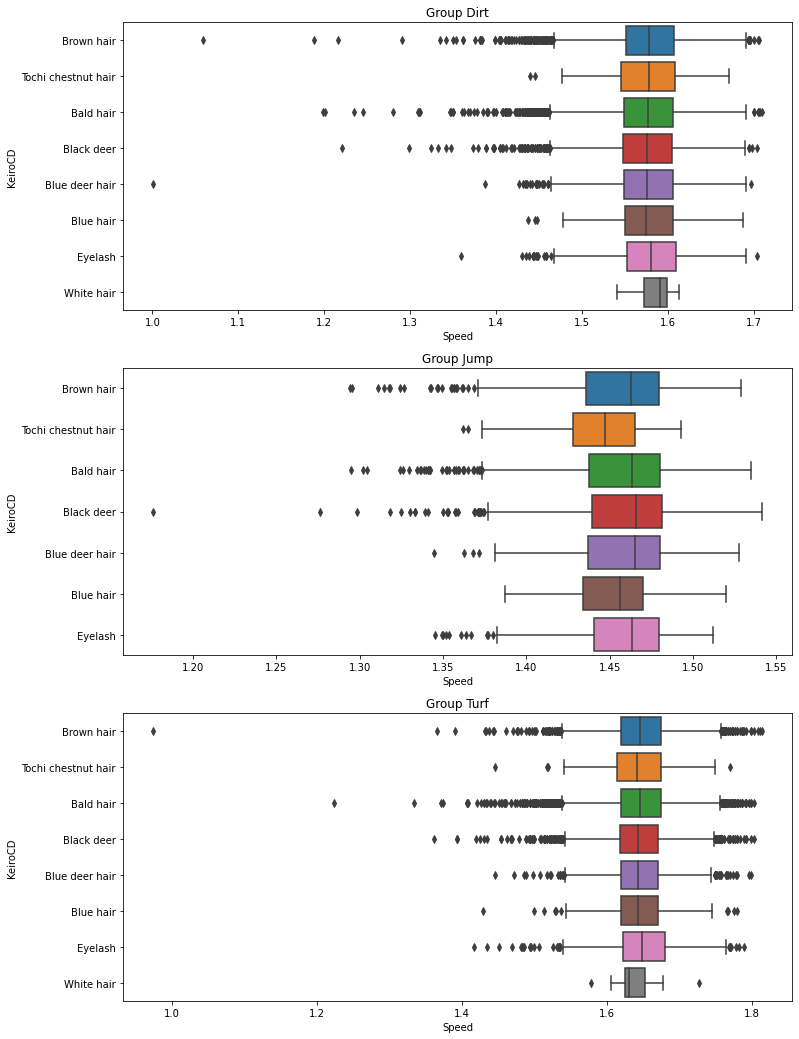

In [37]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='KeiroCD', orient='h')
    plt.title(f'Group {group}')
    ticklabels = map_axis_ticklabels(horse_map, 'KeiroCD', ax, 'y')


### Area

<AxesSubplot:xlabel='TozaiCD', ylabel='Speed'>

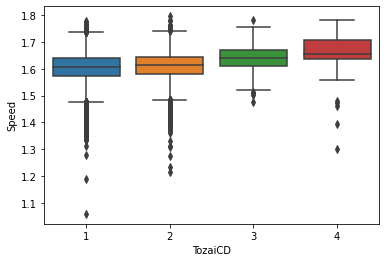

In [38]:
sns.boxplot(data=df_horse, y='Speed', x='TozaiCD')

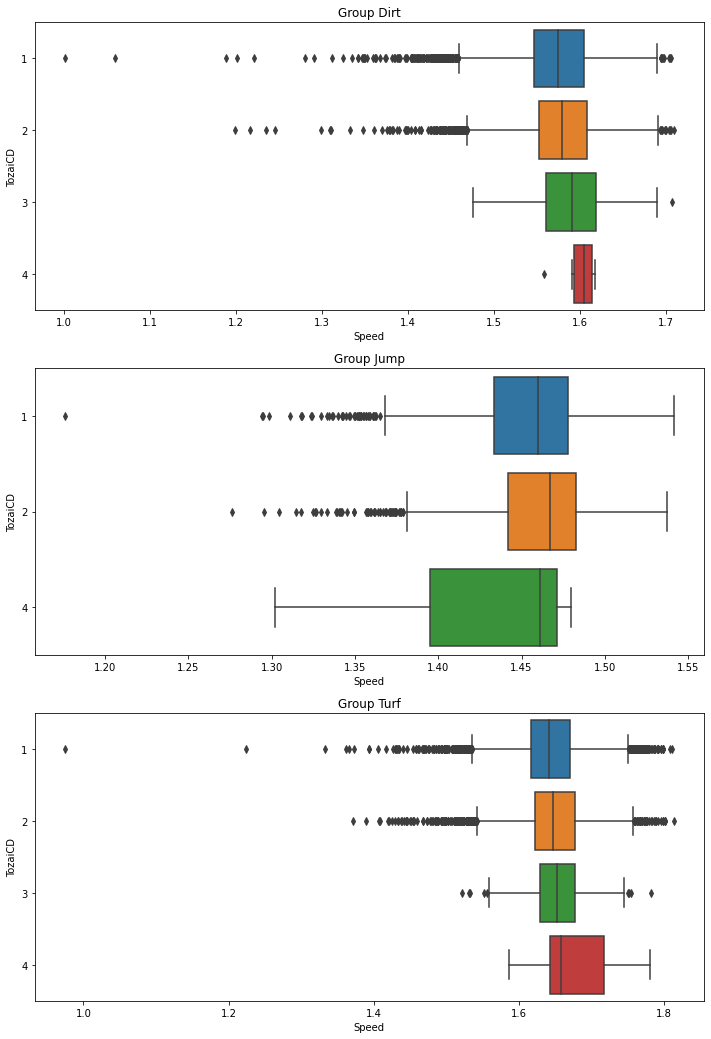

In [39]:
plt.figure(figsize=(12,df_group_.ngroups*6))
for idx, group in enumerate(groups_):
    plt.subplot(df_group_.ngroups, 1, idx+1)
    ax = sns.boxplot(data=horse_performance_groups[group], x='Speed', y='TozaiCD', orient='h')
    plt.title(f'Group {group}')

# Analyze races

In [40]:
numeric_cols = ['Time', 'Speed', 'Barei', 'Futan', 'BaTaijyu', 'Zogen', 'Kyori']
categorical_cols = [
    'Umaban',
    # 'UmaKigoCD',
    # 'SexCD',
    # 'HinsyuCD',
    # 'KeiroCD',
    # 'TozaiCD',
    'Blinker',
    'RaceInfo$YoubiCD',
    'GradeCD',
    'JyokenInfo$JyuryoCD',
    'TrackCD',
    'TenkoBaba$TenkoCD',
    'TenkoBaba$SibaBabaCD',
    'TenkoBaba$DirtBabaCD']

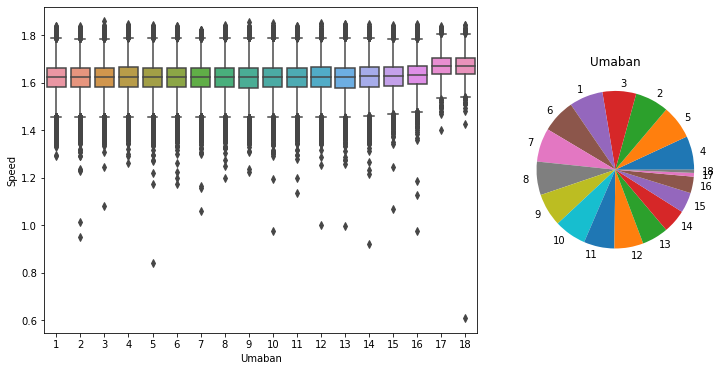

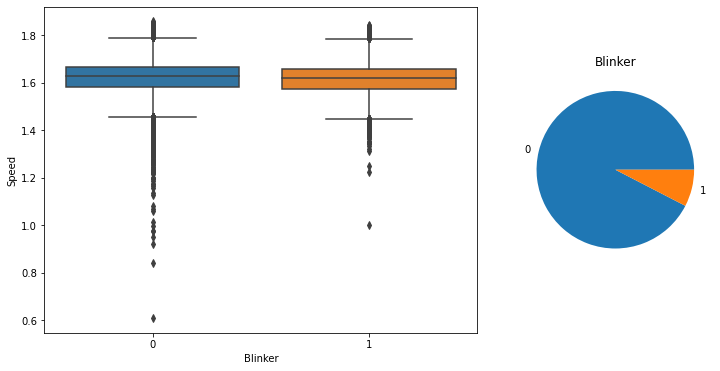

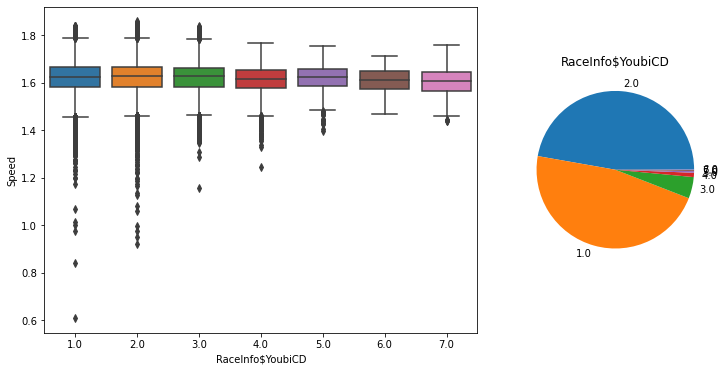

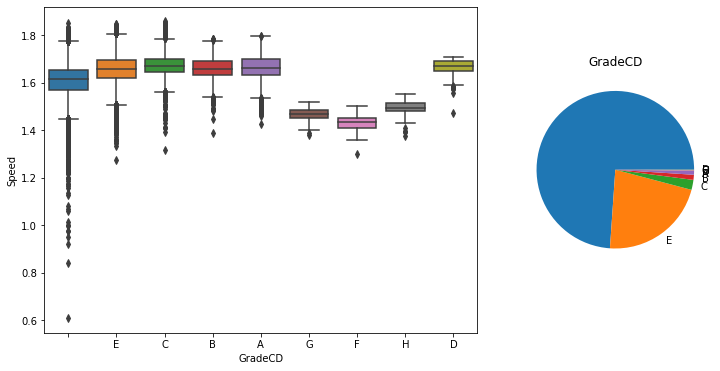

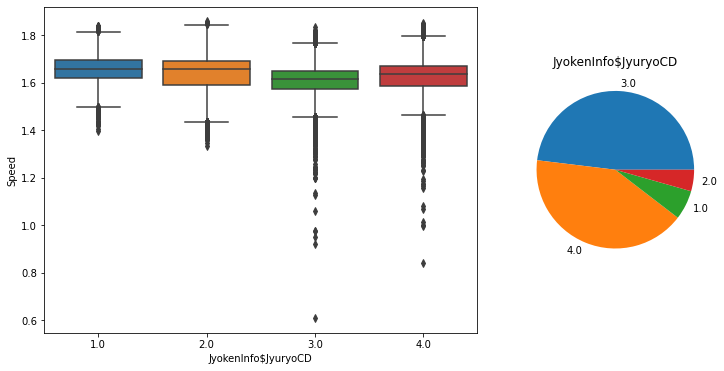

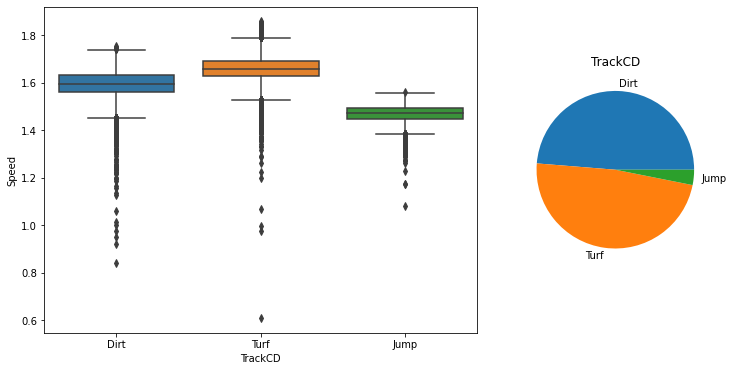

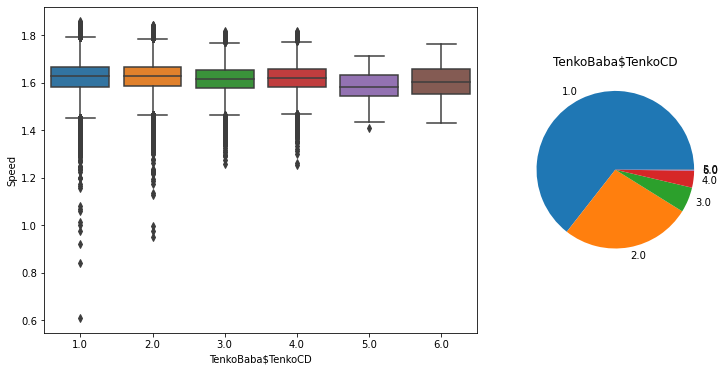

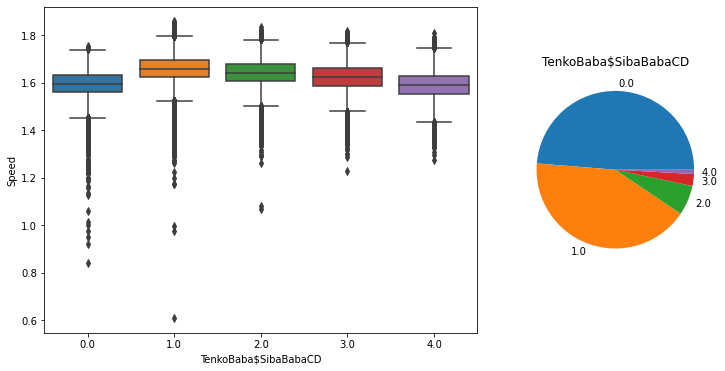

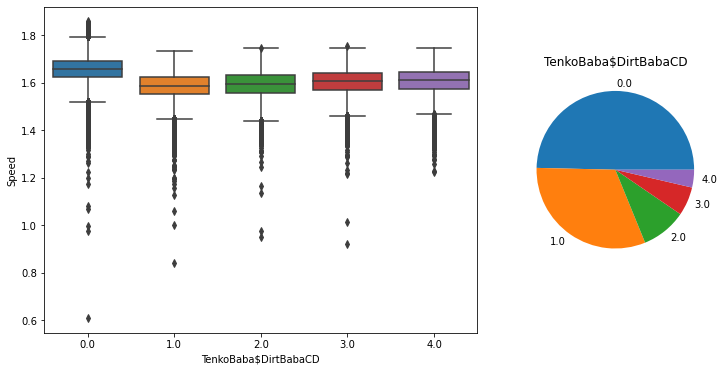

In [41]:
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    plt.subplot(1,3,(1,2))
    sns.boxplot(data=df_valid, x=col, y='Speed')
    plt.subplot(1,3,3)
    data_ = df_valid[col].value_counts()
    plt.pie(x=data_, labels=data_.index)
    plt.title(col)

Các cuộc đua vượt chướng ngại ngựa chạy chậm hơn đáng kể

G, F, H là các cuộc đua disability nên phù hợp

Các tình trạng thời tiết: ngựa chạy không tốt trong thời tiết có tuyết (snow (5))

Các tình trạng sân cỏ: ngựa chạy tốt hơn khi mặt sân cứng (firm (1))

Các tình trạng sân đất: ngựa chạy có vẻ đồng đều tại các tình trạng khác nhau

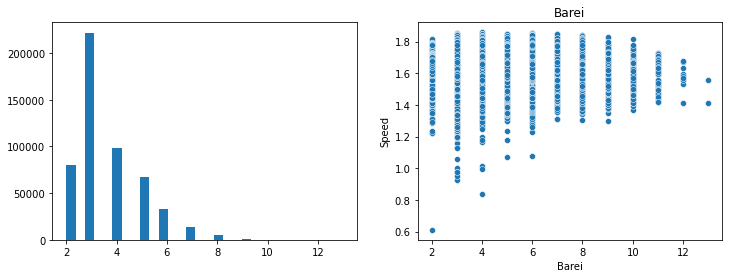

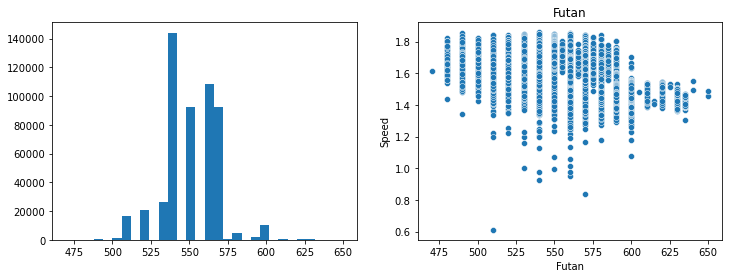

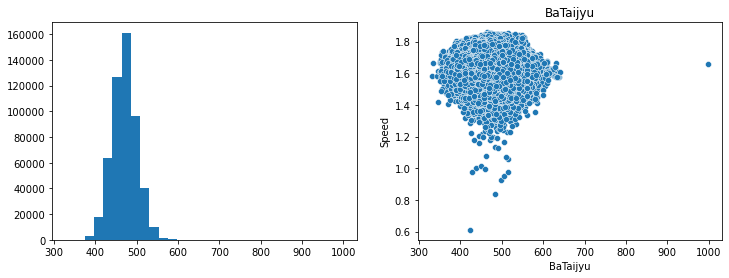

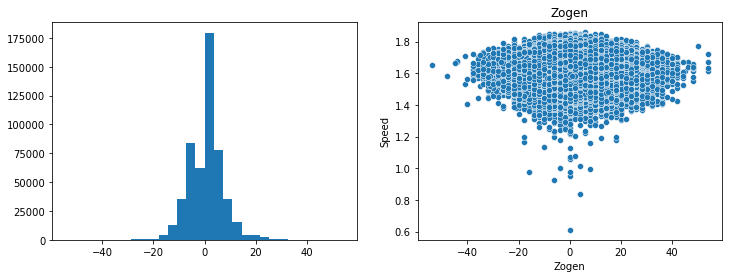

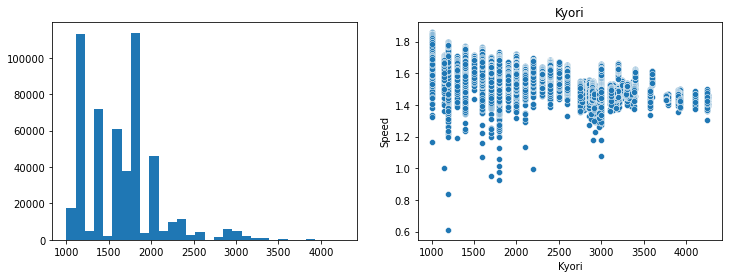

In [42]:
for col in numeric_cols[2:]:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.hist(data=df_valid, x = col, bins=30)
    plt.subplot(1,2,2)
    sns.scatterplot(data=df_valid, x = col, y='Speed')
    plt.title(col)

## Fix speed

In [43]:
trackid_speed_ratio = df_valid.groupby('TrackCD').agg({'Speed':'median'})
trackid_speed_ratio['Ratio'] = trackid_speed_ratio.loc['Turf', 'Speed']/trackid_speed_ratio['Speed']
trackid_speed_ratio

,Speed,Ratio
TrackCD,,
Dirt,1.595745,1.039494
Jump,1.472107,1.126798
Turf,1.658768,1.000000


In [63]:
fix_speed_ratio = trackid_speed_ratio['Ratio'].to_dict()
df['Speed_fixed'] = df.apply(lambda row: fix_speed_ratio[row['TrackCD']]*row['Speed'], axis=1)
df['Speed_fixed'].isna().sum()

0

## Columns that's not analyzed

In [45]:
for col in df_origin.columns:
    if col not in essential_cols:
        print(col)

Wakuban
BanusiCode
NyusenJyuni
ChakusaCD
ChakusaCDP
Ninki
RecordUpKubun
DMGosaP
DMGosaM
DMJyuni
KyakusituKubun
RaceInfo$TokuNum
RaceInfo$Kakko
RaceInfo$KakkoEng
RaceInfo$Kubun
RaceInfo$Nkai
JyokenInfo$SyubetuCD
JyokenInfo$KigoCD
JyokenInfo$JyokenCD$1
JyokenInfo$JyokenCD$2
JyokenInfo$JyokenCD$3
JyokenInfo$JyokenCD$4
JyokenInfo$JyokenCD$5
CourseKubunCD
Honsyokin$1
Honsyokin$2
Honsyokin$3
Honsyokin$4
Honsyokin$5
Honsyokin$6
Fukasyokin$1
Fukasyokin$2
Fukasyokin$3
Fukasyokin$4
Fukasyokin$5
TorokuTosu
SyussoTosu
NyusenTosu


# Transform data

In [46]:
categorical_cols = ['UmaKigoCD', 'SexCD', 'HinsyuCD', 'TozaiCD', 'MinaraiCD', 'JyokenInfo$JyuryoCD', 'TrackCD']

In [64]:
dummies_df = pd.get_dummies(df[categorical_cols].astype('category'), dtype=np.float16, drop_first=False)

df = pd.concat([df, dummies_df], axis=1).drop(categorical_cols, axis=1)
df.dropna(axis=1, inplace=True)

In [65]:
df.head(2)

,raceid,Time,KakuteiJyuni,DochakuKubun,DochakuTosu,Umaban,KettoNum,KeiroCD,Barei,ChokyosiCode,Futan,Blinker,KisyuCode,BaTaijyu,Zogen,IJyoCD,Honsyokin,Kyori,Speed,Top 1,Top 3,KakuteiJyuni_fixed,Speed_fixed,UmaKigoCD_0,UmaKigoCD_1,UmaKigoCD_5,UmaKigoCD_6,UmaKigoCD_11,UmaKigoCD_21,UmaKigoCD_22,UmaKigoCD_26,SexCD_1,SexCD_2,SexCD_3,HinsyuCD_1,HinsyuCD_2,TozaiCD_1,TozaiCD_2,TozaiCD_3,TozaiCD_4,MinaraiCD_0,MinaraiCD_1,MinaraiCD_2,MinaraiCD_3,JyokenInfo$JyuryoCD_1.0,JyokenInfo$JyuryoCD_2.0,JyokenInfo$JyuryoCD_3.0,JyokenInfo$JyuryoCD_4.0,TrackCD_Dirt,TrackCD_Jump,TrackCD_Turf
0,2008-01-05 01:06,752,8,0,0,1,2005107051,3,3,437,540,0,1031,428,12.0,0,0,1200.0,1.595745,False,False,47.2,1.658768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2008-01-05 01:06,739,1,0,0,2,2005102028,3,3,138,540,0,733,450,-10.0,0,50000,1200.0,1.623816,True,True,1.0,1.687948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [66]:
df.to_csv('../data/historical_data/cleaned_data.csv', index=False)